## Creating Churn risk scores that can be indicative to drive retention campaigns.
## Introduce new predicting  variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers can be targeted to Churn YES customers. 
## Exporting the trained model with prediction capability for CHURN-FLAG, which can be highlighted in service applications to serve the customer better. 

In [1]:
## Step 1 Importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
## Step 2 Loading the dataset
df=pd.read_csv('churnoriginaldata')
pd.set_option('display.max_columns',None)
df.head()

,Unnamed: 0,State,AccountLength,AreaCode,Phone,InternationalPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,InternationalMins,Internationalcalls,InternationalCharge,CustServCalls,Churn
0,0,KS,128,415,3824657,no,yes,25,2651,110,4507,1974,99,1678,2447,91,1101,100,3,27,1,False
1,1,OH,107,415,3717191,no,yes,26,1616,123,2747,1955,103,1662,2544,103,1145,137,3,37,1,False
2,2,NJ,137,415,3581921,no,no,0,2434,114,4138,1212,110,103,1626,104,732,122,5,329,0,False
3,3,OH,84,408,3759999,yes,no,0,2994,71,509,619,88,526,1969,89,886,66,7,178,2,False
4,4,OK,75,415,3306626,yes,no,0,1667,113,2834,1483,122,1261,1869,121,841,101,3,273,3,False


In [3]:
## Step 3 Dropping the columns that are not required
del_list=['Unnamed: 0'] 
df.drop(del_list,axis=1,inplace=True)

In [3]:
## Step 4 Checking for missing values
df.isnull().sum()
## No missing values found

Unnamed: 0             0
State                  0
AccountLength          0
AreaCode               0
Phone                  0
InternationalPlan      0
VMailPlan              0
VMailMessage           0
DayMins                0
DayCalls               0
DayCharge              0
EveMins                0
EveCalls               0
EveCharge              0
NightMins              0
NightCalls             0
NightCharge            0
InternationalMins      0
Internationalcalls     0
InternationalCharge    0
CustServCalls          0
Churn                  0
dtype: int64

In [4]:
## STep 5 Checking for duplicate values
df.duplicated().sum()

0

In [4]:
## Step 6 Handling the categorical features
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['InternationalPlan']=labelencoder.fit_transform(df['InternationalPlan'])
df['VMailPlan']=labelencoder.fit_transform(df['VMailPlan'])
df['Churn']=labelencoder.fit_transform(df['Churn'])
df['State']=labelencoder.fit_transform(df['State'])
df['AreaCode']=labelencoder.fit_transform(df['AreaCode'])

In [6]:
df.head()

,State,AccountLength,AreaCode,InternationalPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,InternationalMins,Internationalcalls,InternationalCharge,CustServCalls,Churn
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
## Step 8 Checking for outlier
## During eda we have found some outliers in varibales daycall,charges,and mins but they were in less no
## hence we have not removed them as the data set is quite small.

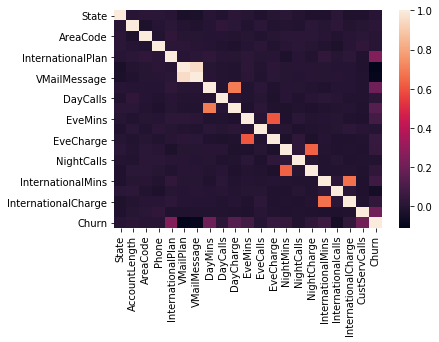

In [5]:
## Step 9 Finding relationship among all other numerical independent variable
##X=df.iloc[:,0:20]
##y=df.Churn
corrmat=df.corr()
fig,ax=plt.subplots()
sns.heatmap(corrmat)

## Independent variable except respective charges and mins are related with each other.
## There is no relationship among the independent vaiables.
## We have found CustServcalls,DayMins,internationalplan are related to churn


In [6]:
## Step 9.1  With brute force approach
def Correlation(dataset,threshold):
    col_corr=set() ## set of names of all correlated columns
    corrmat=dataset.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j]) > threshold: ## absolute cooefficient values
                colnames=corrmat.columns[i]   ## getting the name of columns
                col_corr.add(colnames)
    return col_corr

In [7]:
corr_features=Correlation(df,0.8)
len(set(corr_features))

1

In [9]:
corrmat = df.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.6]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,VMailPlan,VMailMessage,0.95528
1,VMailMessage,VMailPlan,0.95528
2,DayMins,DayCharge,0.69565
3,DayCharge,DayMins,0.69565
4,InternationalMins,InternationalCharge,0.66986


In [22]:
## Step 10 Feature selection
## Step 10.1 Using feature 
## creating dataframe where we have removed corelated features
dm=df[['State','AccountLength','AreaCode','InternationalPlan','VMailPlan','DayMins','DayCalls',
      'EveMins','EveCalls','NightMins','NightCalls','InternationalMins','Internationalcalls'
      ,'CustServCalls','Churn']]
X=dm.iloc[:,0:14]
y=dm.Churn
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
FS_model=ExtraTreesClassifier()
FS_model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

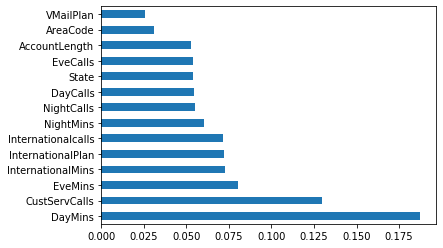

In [23]:
feat_importances = pd.Series(FS_model.feature_importances_, index=X.columns)
feat_importances.nlargest(19).plot(kind='barh')
plt.show()

In [24]:
## Step 10.2 using selectKbest
from sklearn.feature_selection import SelectKBest,chi2
X=dm.iloc[:,0:14]
y=dm.Churn
bestfeatures=SelectKBest(score_func=chi2,k='all')
fit=bestfeatures.fit(X,y)

In [25]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

In [26]:
## concatinating 2 df for better visulaization
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['specs','score']
featureScores

,specs,score
0,State,4.673663
1,AccountLength,23.418636
2,AreaCode,0.130563
3,InternationalPlan,276.614354
4,VMailPlan,41.021084
5,DayMins,30551.001348
6,DayCalls,4.826722
7,EveMins,4459.930544
8,EveCalls,0.068335
9,NightMins,1100.116754


In [27]:
print(featureScores.nlargest(10,'score'))

                 specs         score
5              DayMins  30551.001348
7              EveMins   4459.930544
9            NightMins   1100.116754
3    InternationalPlan    276.614354
13       CustServCalls    220.546005
11   InternationalMins    143.059561
4            VMailPlan     41.021084
1        AccountLength     23.418636
12  Internationalcalls     13.215160
6             DayCalls      4.826722


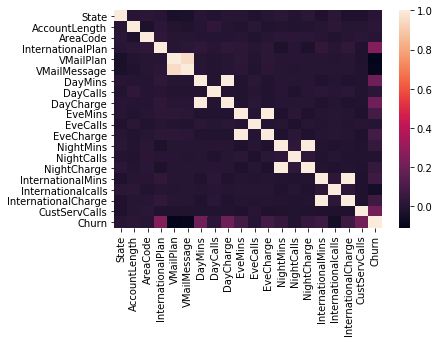

In [14]:
## Step 10.3 Haetmap analysis
df.corr()
import seaborn as sns
sns.heatmap(df.corr())

In [14]:
## Step 11 Checking the dataset balanced or imbalanced
df.Churn.value_counts()
## 86% (0) i.e no churn
##14% (1) i.e churn

0    3961
1     656
Name: Churn, dtype: int64

In [5]:
##step 11.1 Balancing the dataset with SMOTE
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split

In [6]:
X=df.loc[:,['InternationalPlan','DayMins','EveMins','NightMins','InternationalMins','VMailPlan','CustServCalls']]  
y=df.Churn


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [8]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 470
Before OverSampling, counts of label '0': 2761 



In [9]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


After OverSampling, the shape of train_X: (5522, 7)
After OverSampling, the shape of train_y: (5522,) 

After OverSampling, counts of label '1': 2761
After OverSampling, counts of label '0': 2761


In [10]:
## Step 12 Modeling the business problem with logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score


In [63]:
model=LogisticRegression()
model.fit(X_train_res,y_train_res)

C:\Users\Shubhangi sakarkar\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
y_pred = model.predict(X_train_res)
score_ = model.score(X_train_res, y_train_res)
conf_m = confusion_matrix(y_train_res, y_pred)
report = classification_report(y_train_res, y_pred)
score_

0.698297718218037

In [85]:
## Step 13 Modelling the business problem with Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [86]:
y_pred = model.predict(X_test)


In [87]:
acc=accuracy_score(y_test, y_pred)
acc

0.8282828282828283

In [88]:
##Step 13.1 Hypertuning the parameters of Decision tree
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   18.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


In [89]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=99,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [90]:
tuned_model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=99,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [91]:
tuned_model.fit(X_train_res,y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=99,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [92]:
y_pred = tuned_model.predict(X_test)

In [93]:
acc=accuracy_score(y_test,y_pred)
acc

0.8405483405483406

In [74]:
pd.crosstab(y_test, y_pred)

col_0,0,1
Churn,,
0,1005,195
1,61,125


In [71]:
df.head()

,InternationalPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,InternationalMins,Internationalcalls,InternationalCharge,CustServCalls,Churn,Churn_Score
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,4.76
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,15.89
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,71.67
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,97.83
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,72.48


In [94]:
##  step 14 Modelling the business problem with RandomForest
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=10)
RF_model.fit(X_train_res,y_train_res)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
y_pred=RF_model.predict(X_test)

In [96]:
acc=accuracy_score(y_test,y_pred)
acc

0.8924963924963925

In [26]:
## step 14.1 Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [27]:
rf_random.fit(X_train_res,y_train_res)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [28]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
tuned_model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
tuned_model.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
y_pred=tuned_model.predict(X_test)

In [32]:
acc=accuracy_score(y_test,y_pred)
acc

0.7655122655122655

In [17]:
! pip install xgboost

  Using cached xgboost-1.0.2-py3-none-win_amd64.whl (24.6 MB)


In [60]:
## Step 15  using XGBoost model
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [18]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_res,y_train_res)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [26]:

y_predict=xgb_model.predict(X_test)

In [64]:
## Step 15.1 Hyperparameter tuning of model
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
classifier=xgboost.XGBClassifier()

random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   16.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [65]:

random_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [66]:

random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [69]:
tuned_model=xgb.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=3, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [70]:
tuned_model.fit(X_train_res,y_train_res)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [71]:
y_predict1=tuned_model.predict(X_test)

In [72]:
score=accuracy_score(y_test,y_predict1)
score

0.8874458874458875

In [49]:
## Step 16 Using Ada boosting 
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
base_estimator=DecisionTreeClassifier()
base_estimator1=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None,oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model=AdaBoostClassifier(n_estimators=100,learning_rate=1.0,base_estimator=base_estimator1)

In [50]:
model.fit(X_train_res,y_train_res)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=100,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=2,
                                                         min_samples_split=10,
                                       

In [51]:
y_predict=model.predict(X_test)

In [52]:
score=accuracy_score(y_test,y_predict)
score

0.9062049062049062

In [58]:
#3 STep 16.1 COnfusion matrix

from sklearn.metrics import classification_report
classification_report(y_train_res,y_predict)

ValueError: Found input variables with inconsistent numbers of samples: [5522, 1386]

In [88]:
## Step 17 Using Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=12)
model.fit(X_train_res,y_train_res)
y_predict=model.predict(X_test)
score=accuracy_score(y_test,y_predict)
score

0.8802308802308803

In [17]:
##step 18 Creating the churn score
## So we got 90.5% of accuracy with adaboosting hence we will calculate the chrun score on this model
y_pred=model.predict_proba(X_test)[:,1]

In [18]:
df['Churn_Score']=model.predict_proba(X)[:,1] ## predicting probability for churn is true

In [19]:
df['Churn_Score']=df['Churn_Score'].apply(lambda x: round(x*100,2))

In [ ]:
## Step 19 Creating Zones
## We have calculated churn score between 1 to 100.
## So will create zones for the customers who is more likely to churn as we have caluclted score based on
## probability of churn= 1
## RED ZONE USERS:- Churn score 75 to 100
## ORANGE ZONE USERS:-churn score 50 to 74
## GREEN ZONE UESERS:-CHURN SCORE  below 49

In [21]:
def f(row):
    if row['Churn_Score'] >= 75:
        val = 'RED ZONE USER'
    elif row['Churn_Score'] <= 49:
        val = 'GREEN ZONE'
    else:
        val = 'ORANGE ZONE'
    return val

In [22]:
df['Zone'] = df.apply(f, axis=1)

In [23]:
df.Zone.value_counts()

GREEN ZONE       3951
RED ZONE USER     453
ORANGE ZONE       213
Name: Zone, dtype: int64

In [24]:
df.head()

,Unnamed: 0,State,AccountLength,AreaCode,Phone,InternationalPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,InternationalMins,Internationalcalls,InternationalCharge,CustServCalls,Churn,Churn_Score,Zone
0,0,16,128,1,3824657,0,1,25,2651,110,4507,1974,99,1678,2447,91,1101,100,3,27,1,0,4.16,GREEN ZONE
1,1,35,107,1,3717191,0,1,26,1616,123,2747,1955,103,1662,2544,103,1145,137,3,37,1,0,6.06,GREEN ZONE
2,2,31,137,1,3581921,0,0,0,2434,114,4138,1212,110,103,1626,104,732,122,5,329,0,0,18.85,GREEN ZONE
3,3,35,84,0,3759999,1,0,0,2994,71,509,619,88,526,1969,89,886,66,7,178,2,0,46.02,GREEN ZONE
4,4,36,75,1,3306626,1,0,0,1667,113,2834,1483,122,1261,1869,121,841,101,3,273,3,0,47.88,GREEN ZONE


In [26]:
## Step 20 Creating flag for emails to user to be trigger
df['EMail']=df.loc[df['Zone'] == 'RED ZONE USER','EMail']='Trigger Email with customized offers'

In [28]:
df['EMail']=df.loc[df['Zone'] == 'ORANGE ZONE','EMail']='Trigger Email with new offers'

In [29]:
df['EMail']=df.loc[df['Zone'] == 'GREEN ZONE','EMail']='No emails'

In [30]:
df.head()

,Unnamed: 0,State,AccountLength,AreaCode,Phone,InternationalPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,InternationalMins,Internationalcalls,InternationalCharge,CustServCalls,Churn,Churn_Score,Zone,EMail
0,0,16,128,1,3824657,0,1,25,2651,110,4507,1974,99,1678,2447,91,1101,100,3,27,1,0,4.16,GREEN ZONE,No emails
1,1,35,107,1,3717191,0,1,26,1616,123,2747,1955,103,1662,2544,103,1145,137,3,37,1,0,6.06,GREEN ZONE,No emails
2,2,31,137,1,3581921,0,0,0,2434,114,4138,1212,110,103,1626,104,732,122,5,329,0,0,18.85,GREEN ZONE,No emails
3,3,35,84,0,3759999,1,0,0,2994,71,509,619,88,526,1969,89,886,66,7,178,2,0,46.02,GREEN ZONE,No emails
4,4,36,75,1,3306626,1,0,0,1667,113,2834,1483,122,1261,1869,121,841,101,3,273,3,0,47.88,GREEN ZONE,No emails
